
# 전체 코드


-- 생선이 도미인지 빙어인지 판단합니다. --

생선의 길이 : 25
생선의 무게 : 150


distance : [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
indexes : [[21 33 19 30  1]]




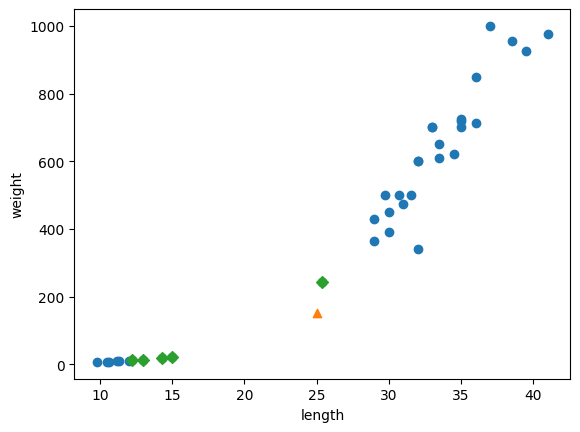

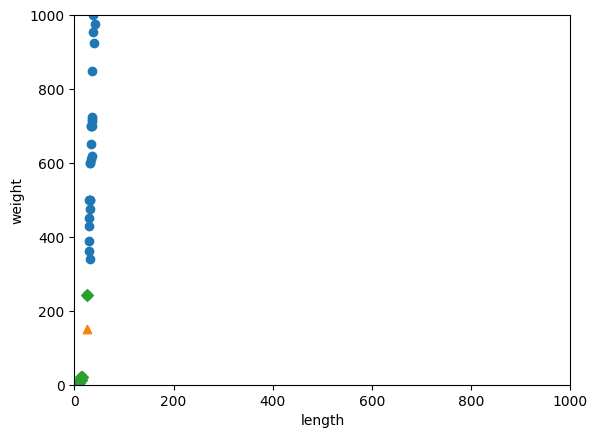

mean : [ 27.29722222 454.09722222] std : [  9.98244253 323.29893931] 



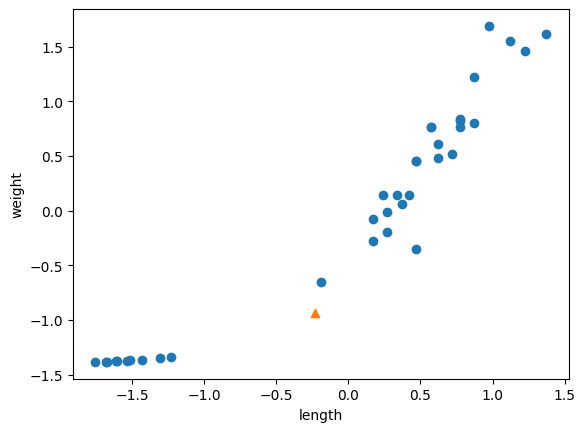


예측 : [1.]


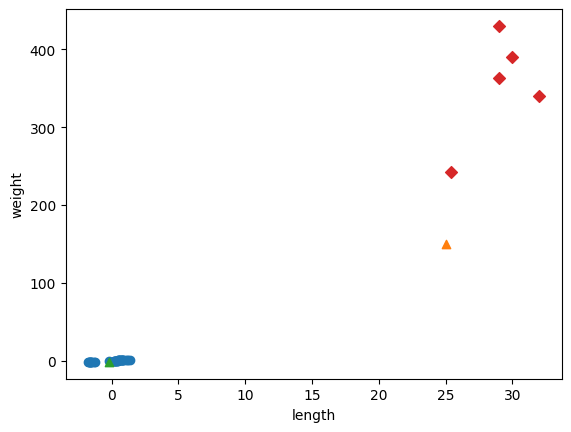


입력하신 생선은 도미입니다.


In [16]:
# 넘파이로 데이터 준비하기

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는 것이 더 좋다.

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# print("fish_data :\n", fish_data)
# print("fish_target :\n", fish_target)

# 사이킷런으로 훈련세트와 테스트세트 나누기

from sklearn.model_selection import train_test_split

# train_test_split()
# - 전달되는 리스트나 배열을 섞은 후에 비율에 맞게 훈련세트와 테스트세트로 나누어준다.
# - 기본적으로 25%를 테스트세트로 떼어낸다.
# - random_state : np.random.seed()와 같이 랜덤시드를 지정할 수 있는 매개변수이다.
# - stratify : 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용하다.

# 2개의 배열을 전달했으므로 2개씩 나누어 총 4개의 배열이 반환된다.

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target
)

# print("\nshape :", train_input.shape, test_input.shape, train_target.shape, test_target.shape)
# print("test_target :", test_target)

# 수상항 도미 한 마리

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target) # 훈련

kn.score(test_input, test_target) # 정확도 평가

print("\n-- 생선이 도미인지 빙어인지 판단합니다. --\n")
input_l = int(input("생선의 길이 : "))
input_w = int(input("생선의 무게 : "))

print("\n")

#print(kn.predict([[input_l, input_w]])) # 도미의 길이와 무게를 넣었는데 예측값으로 빙어가 나온다.

# 산점도 그리기

import matplotlib.pyplot as plt

# plt.scatter(train_input[:,0], train_input[:,1])
# plt.scatter(input_l, input_w, marker='^') # 예측할 도미 값의 모양을 지정
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

# kneighbors() : 주어진 샘플에서 가장 가까운 이웃을 찾아준다.
distance, indexes = kn.kneighbors([[input_l, input_w]])
print("distance :", distance)
print("indexes :", indexes)
print("\n")
# print("train_input[indexes] :\n", train_input[indexes])
# print("train_target[indexes] :\n", train_target[indexes])
# print("\n")

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(input_l, input_w, marker='^') # 예측할 도미 값의 모양을 지정
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 기준을 맞춰라

# 위의 산점도를 보면 x축은 범위(10~40)가 좁고 y축은 범위(0~1000)가 넓다.
# 이처럼 두 특성 (길이와 무게) 의 값이 놓인 범위가 다를 때, 두 특성의 스케일(scale)이 다르다고 말한다.

import matplotlib.pyplot as plt

distance, indexes = kn.kneighbors([[input_l, input_w]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(input_l, input_w, marker='^') # 예측할 도미 값의 모양을 지정
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
# 산점도의 x축 범위와 y축 범위를 맞춰보자.
plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.show()

# mean : 평균
# std : 표준편차

# - axis=0 : 행을 따라 각 열의 통계 값을 계산한다.
# - axis=1 : 열을 따라 각 행의 통계 값을 계산한다.

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print("mean :", mean, "std :", std, "\n")

# 훈련 입력 데이터 스케일 변환 : 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환
train_scaled = (train_input - mean) / std

# 브로드캐스팅 (broadcasting)

# 전처리 데이터로 모델 훈련하기

new = ([input_l, input_w] - mean) / std # 예측할 도미도 똑같이 스케일을 변환한다.

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^') # 예측할 도미 값의 모양을 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std # 테스트 입력 데이터 스케일 변환

kn.score(test_scaled, test_target) # 정확도 평가

print("\n예측 :", kn.predict([new])) # 예측

# 산점도 그리기

distance, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(input_l, input_w, marker='^') # 예측할 도미 값의 모양을 지정
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 예측 및 결과 출력
result = kn.predict([new])
if result[0] == 1 : print("\n입력하신 생선은 도미입니다.")
else : print("\n입력하신 생선은 빙어입니다.")

#요약

정확도: 1.0

-- 생선이 도미인지 빙어인지 판단합니다. --

생선의 길이 : 25
생선의 무게 : 150

입력하신 생선은 빙어입니다.


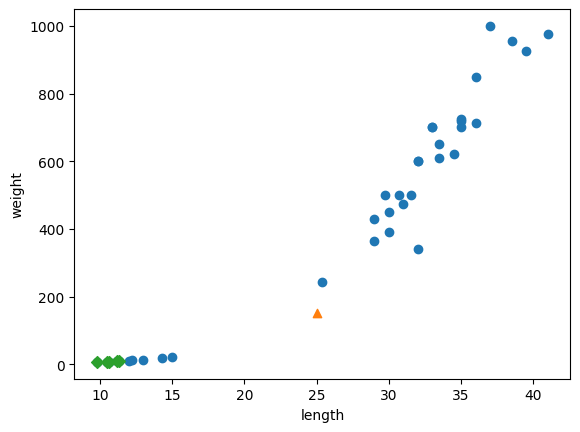

In [13]:
# 넘파이로 데이터 준비하기
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 준비
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# 사이킷런으로 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target
)

# 훈련 모델 준비 및 훈련
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

# 정확도 평가
print("정확도:", kn.score(test_input, test_target))

# 예측할 도미의 길이와 무게

print("\n-- 생선이 도미인지 빙어인지 판단합니다. --\n")
input_l = int(input("생선의 길이 : "))
input_w = int(input("생선의 무게 : "))

new = ([input_l, input_w] - np.mean(train_input, axis=0)) / np.std(train_input, axis=0)  # 스케일 변환

# 예측 및 결과 출력
result = kn.predict([new])
if result[0] == 1 : print("\n입력하신 생선은 도미입니다.")
else : print("\n입력하신 생선은 빙어입니다.")

# 훈련 데이터와 예측한 데이터 시각화
import matplotlib.pyplot as plt

distance, indexes = kn.kneighbors([new])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(input_l, input_w, marker='^')  # 예측할 도미 값의 모양을 지정
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 예측할 때 책과 동일하게 [25,150] 값으로 해보기